In [58]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/chia_cluster/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/chia_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [59]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [60]:
analysis = scripts.Analysis()

In [61]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/chia_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band07_wn_1215_1380',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.7_.7_.7_.7_.7_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_none',
                          'crd_64c2abc',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [62]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/chia_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band07_wn_1215_1380',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.7_.7_.7_.7_.7_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_none',
                          'crd_64c2abc',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [63]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [64]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [65]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [66]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [67]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1215

nband = 165

nv = 200

dv = 0.005

tsfc = 294.0

ng = 6

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 6 /)

data wgt
     &     /5 * .7, .9/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 5e-25

include 'mls75.pro'


In [68]:
fig.display_hrefanchor()

In [69]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [70]:
table_dgdgs.display_hrefanchor()

In [71]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [72]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [73]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

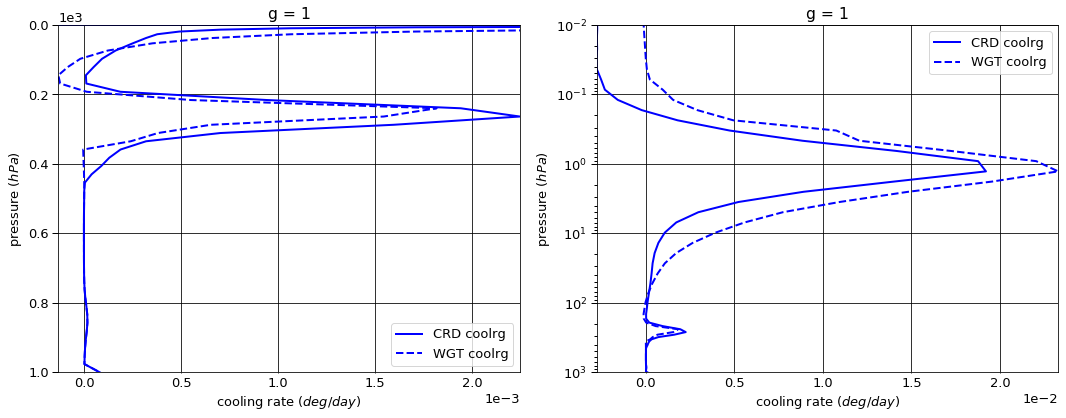

# Figure: cooling rate g-group 2

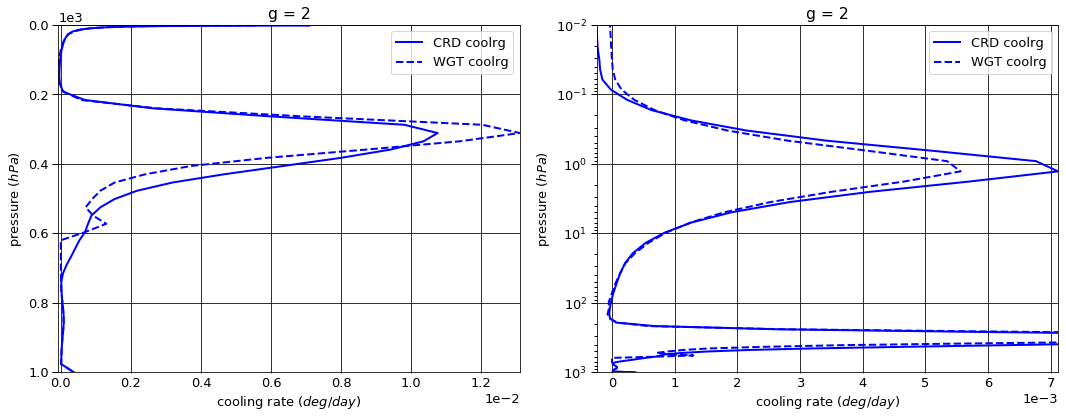

# Figure: cooling rate g-group 3

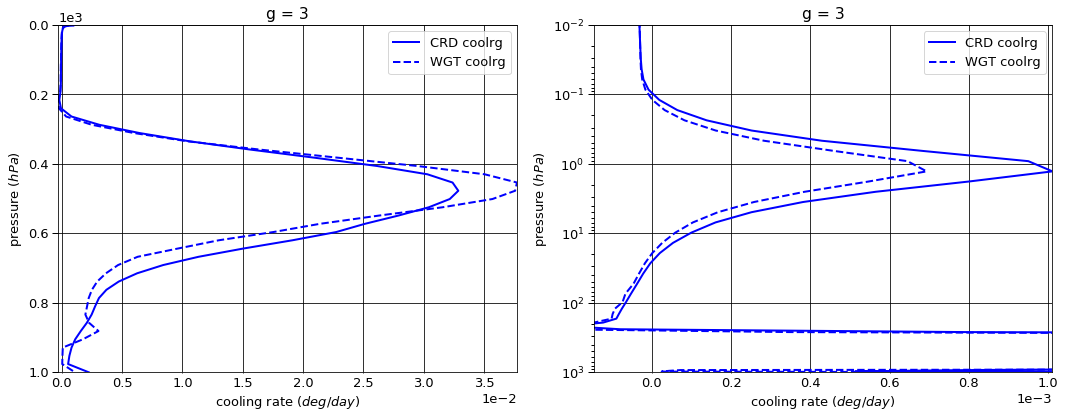

# Figure: cooling rate g-group 4

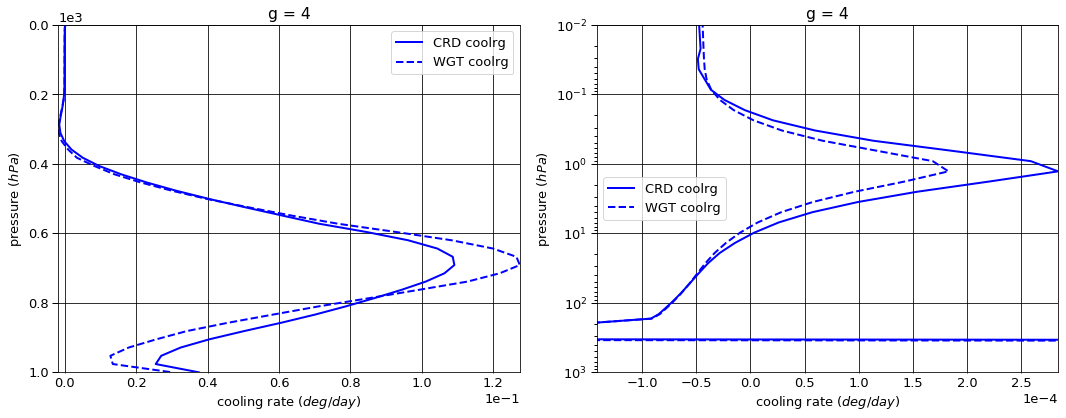

# Figure: cooling rate g-group 5

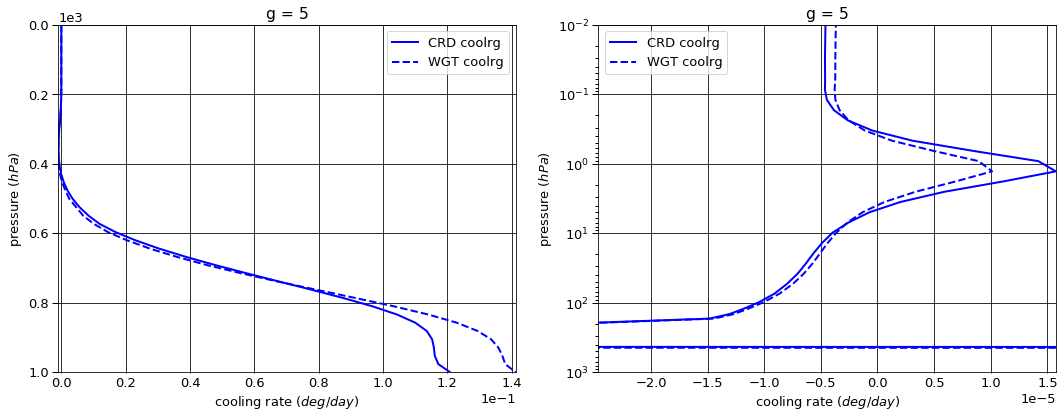

# Figure: cooling rate g-group 6

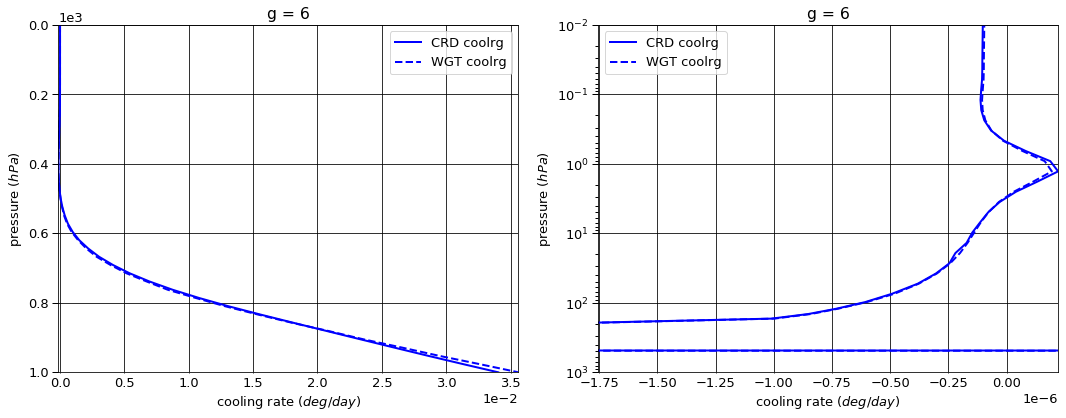

# Figure: cooling rate g-group total

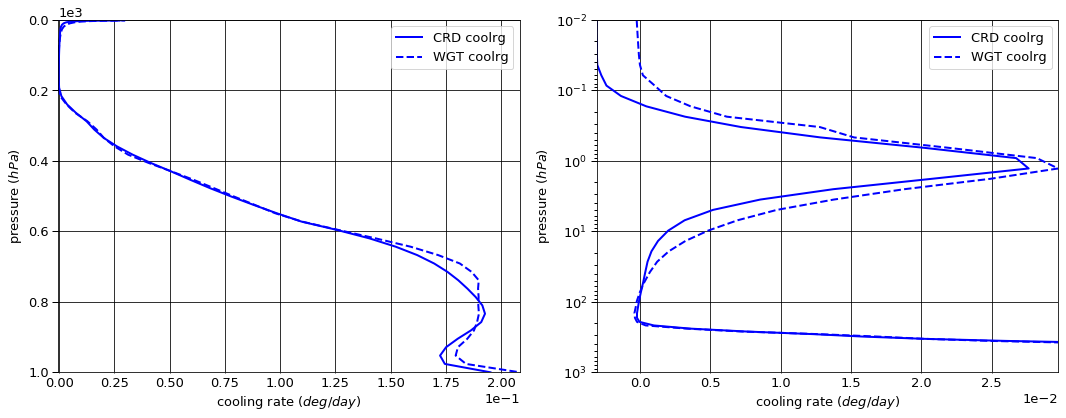

In [74]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [75]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.033747  0.000000 -0.033747
  1013.0   76    -0.224406  0.224180 -0.000226
2 0.0      1     -0.234135  0.000000 -0.234135
  1013.0   76    -1.050549  1.049507 -0.001042
3 0.0      1     -1.139923  0.000000 -1.139923
  1013.0   76    -3.083169  3.077457 -0.005712
4 0.0      1     -4.731915  0.000000 -4.731915
  1013.0   76    -8.050358  7.876776 -0.173583
5 0.0      1     -6.690075  0.000000 -6.690075
  1013.0   76    -7.938995  5.429982 -2.509014
6 0.0      1     -3.268173  0.000000 -3.268173
  1013.0   76    -3.407698  0.857433 -2.550265


WGT


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.032186  0.000000 -0.032186
  1013.0   76    -0.224406  0.224180 -0.000226
2 0.0      1     -0.217295  0.000000 -0.217295
  1013.0   76    -1.050549  1.049507 -0.001042
3 0.0      1     -1.093012  0.000000 -1.093012
  1013.0   76    -3.083169  3.080132 -0.003036
4 0.0      1     -4.621898  0.000000 -4.621898
  1013.0   76    -8.050358  7.950894 -0.099465
5 0.0      1     -6.690945  0.000000 -6.690945
  1013.0   76    -7.938995  5.789894 -2.149101
6 0.0      1     -3.271520  0.000000 -3.271520
  1013.0   76    -3.407698  0.860122 -2.547576


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.001562  0.000000  0.001562
  1013.0   76     0.000000  0.000000  0.000000
2 0.0      1      0.016840  0.000000  0.016840
  1013.0   76     0.000000  0.000000  0.000000
3 0.0      1      0.046911  0.000000  0.046911
  1013.0   76     0.000000  0.002675  0.002675
4 0.0      1      0.110017  0.000000  0.110017
  1013.0   76     0.000000  0.074118  0.074118
5 0.0      1     -0.000870  0.000000 -0.000870
  1013.0   76     0.000000  0.359912  0.359912
6 0.0      1     -0.003347  0.000000 -0.003347
  1013.0   76     0.000000  0.002689  0.002689

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -3.069370e-03
  1001.112500 75     8.073511e-05
2 0.000312    1     -3.079549e-04
  1001.112500 75     3.725512e-04
3 0.000312    1     -3.798455e-05
  1001.112500 75     2.224933e-03
4 0.000312    1     -5.105730e-05
  1001.112500 75     3.752005e-02
5 0.000312    1     -4.444901e-06
  1001.112500 75     1.208626e-01
6 0.000312    1     -9.743414e-08
  1001.112500 75     3.404396e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1     -3.593040e-04
  1001.112500 75     8.073511e-05
2 0.000312    1     -8.739331e-05
  1001.112500 75     3.725512e-04
3 0.000312    1     -3.473974e-05
  1001.112500 75     1.086232e-03
4 0.000312    1     -4.648443e-05
  1001.112500 75     2.999365e-02
5 0.000312    1     -3.542177e-06
  1001.112500 75     1.412575e-01
6 0.000312    1     -9.140605e-08
  1001.112500 75     3.561356e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      2.710066e-03
  1001.112500 75     0.000000e+00
2 0.000312    1      2.205615e-04
  1001.112500 75     0.000000e+00
3 0.000312    1      3.244810e-06
  1001.112500 75    -1.138701e-03
4 0.000312    1      4.572872e-06
  1001.112500 75    -7.526406e-03
5 0.000312    1      9.027248e-07
  1001.112500 75     2.039484e-02
6 0.000312    1      6.028092e-09
  1001.112500 75     1.569596e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-16.097967,0.000000,-16.097967
1013.0,76,-23.755175,18.515335,-5.239840



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-15.926855,0.00000,-15.926855
1013.0,76,-23.755175,18.95473,-4.800446



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.171112,0.000000,0.171112
1013.0,76,0.000000,0.439395,0.439395


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.003471
1001.112500,75,0.195105



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000532
1001.112500,75,0.208404



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.002939
1001.112500,75,0.013299


In [76]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.011182,0.008911
2,0.049788,0.042467
3,0.142939,0.125616
4,0.356909,0.332804
5,0.313758,0.340574
6,0.125424,0.149628


In [77]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.228069e-20
2,1.334168e-21
3,1.449434e-22
4,1.574659e-23
5,1.710702e-24
6,1.858499e-25


In [78]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [6]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [79]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.228069e-20,NaN,0.011182,0.008911,0.011182,0.008911,600.0
2,1.334168e-21,0.10864,0.049788,0.042467,0.060970,0.051378,600.0
3,1.449434e-22,0.10864,0.142939,0.125616,0.203909,0.176994,600.0
4,1.574659e-23,0.10864,0.356909,0.332804,0.560818,0.509798,600.0
5,1.710702e-24,0.10864,0.313758,0.340574,0.874576,0.850372,600.0
6,1.858499e-25,0.10864,0.125424,0.149628,1.000000,1.000000,600.0


In [80]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [81]:
absmean_absmeanlog = pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1, 2],
                sep=r'\s+')

taulyr = pd.read_csv(os.path.join(crd.rundir, 'output_taulyr.dat'),
                     index_col=[0, 1, 2],
                     sep=r'\s+')


pd.set_option('display.max_rows', None)
display.display( 
    pd.concat([absmean_absmeanlog, taulyr], axis=1)
    )
pd.reset_option('display.max_rows')



absmean    absmeanlog      ratio        taulyr
layer g pressure                                                        
1     1 0.000312     2.285560e-20  9.620339e-22  23.757588  1.387065e-06
      2 0.000312     1.127191e-21  4.814783e-23  23.411036  6.842508e-08
      3 0.000312     3.907076e-23  4.004670e-24   9.756300  2.431430e-09
      4 0.000312     9.613212e-24  4.305189e-25  22.329363  5.840695e-10
      5 0.000312     4.328531e-25  3.802863e-26  11.382295  2.677516e-11
      6 0.000312     1.704880e-26  2.583421e-27   6.599311  1.328707e-12
2     1 0.000750     2.296235e-20  9.633917e-22  23.834905  5.612684e-07
      2 0.000750     1.132185e-21  4.824196e-23  23.468882  2.768160e-08
      3 0.000750     3.923419e-23  4.013451e-24   9.775676  9.833623e-10
      4 0.000750     9.630773e-24  4.315438e-25  22.317023  2.356877e-10
      5 0.000750     4.350360e-25  3.814677e-26  11.404270  1.083831e-11
      6 0.000750     1.713398e-26  2.591741e-27   6.610994  5.378436e-13
3     1 0.001052     2.318998e-20  9.660881e-22  24.004003  7.948187e-07
      2 0.001052     1.142853e-21  4.842856e-23  23.598745  3.918221e-08
      3 0.001052     3.958466e-23  4.031389e-24   9.819112  1.391113e-09
      4 0.001052     9.668241e-24  4.336044e-25  22.297381  3.318164e-10
      5 0.001052     4.396980e-25  3.839124e-26  11.453079  1.536000e-11
      6 0.001052     1.731617e-26  2.608800e-27   6.637600  7.622337e-13
4     1 0.001476     2.343279e-20  9.689757e-22  24.183052  1.126573e-06
      2 0.001476     1.154249e-21  4.862749e-23  23.736563  5.551078e-08
      3 0.001476     3.996192e-23  4.050539e-24   9.865828  1.969791e-09
      4 0.001476     9.708240e-24  4.358212e-25  22.275738  4.674369e-10
      5 0.001476     4.446859e-25  3.865356e-26  11.504397  2.178935e-11
      6 0.001476     1.751200e-26  2.627219e-27   6.665603  1.081350e-12
5     1 0.002070     2.367773e-20  9.719211e-22  24.361779  1.596430e-06
      2 0.002070     1.165762e-21  4.882915e-23  23.874308  7.862724e-08
      3 0.002070     4.034612e-23  4.069949e-24   9.913176  2.788810e-09
      4 0.002070     9.748629e-24  4.380891e-25  22.252616  6.583614e-10
      5 0.002070     4.497338e-25  3.892052e-26  11.555186  3.090351e-11
      6 0.002070     1.771116e-26  2.646111e-27   6.693279  1.533832e-12
6     1 0.002904     2.392459e-20  9.749472e-22  24.539371  2.262437e-06
      2 0.002904     1.177382e-21  4.903494e-23  24.011086  1.113816e-07
      3 0.002904     4.073708e-23  4.089688e-24   9.960927  3.949093e-09
      4 0.002904     9.789384e-24  4.404201e-25  22.227379  9.273891e-10
      5 0.002904     4.548387e-25  3.919284e-26  11.605147  4.383482e-11
      6 0.002904     1.791359e-26  2.665555e-27   6.720396  2.176012e-12
7     1 0.004074     2.417342e-20  9.780886e-22  24.714954  3.206303e-06
      2 0.004074     1.189110e-21  4.924710e-23  24.145795  1.577841e-07
      3 0.004074     4.113501e-23  4.109882e-24  10.008806  5.592692e-09
      4 0.004074     9.830516e-24  4.428343e-25  22.199084  1.306414e-09
      5 0.004074     4.600022e-25  3.947191e-26  11.653914  6.217911e-11
      6 0.004074     1.811942e-26  2.685686e-27   6.746665  3.087331e-12
8     1 0.005714     2.442424e-20  9.813952e-22  24.887262  4.543546e-06
      2 0.005714     1.200948e-21  4.946883e-23  24.276858  2.235028e-07
      3 0.005714     4.154015e-23  4.130710e-24  10.056418  7.920480e-09
      4 0.005714     9.872041e-24  4.453606e-25  22.166399  1.840274e-09
      5 0.005714     4.652264e-25  3.975965e-26  11.700970  8.819535e-11
      6 0.005714     1.832884e-26  2.706690e-27   6.771683  4.380327e-12
9     1 0.008015     2.467717e-20  9.849380e-22  25.054540  6.438571e-06
      2 0.008015     1.212898e-21  4.970469e-23  24.402083  3.166020e-07
      3 0.008015     4.195286e-23  4.152426e-24  10.103215  1.121843e-08
      4 0.008015     9.913985e-24  4.480397e-25  22.127468  2.592433e-09
      5 0.008015     4.705151e-25  4.005885e-26  11.745597  1.251025e-10
      6 0.0

# Histogram of wavenumbers in g-group 1

In [82]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [83]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
